# ARBOLES DE DECISIONES

## Definición 
Los árboles de decisión son uno de los algoritmos de Machine Learning más populares, esto se debe a que puede ser fácilmente visible para que un humano pueda entender lo que está sucediendo. Imaginemos un diagrama de flujo, donde cada nivel es una pregunta con una respuesta de sí o no. Eventualmente una respuesta te dará una solución al problema inicial. Esto precisamente es un árbol de decisión. 

<img src="arbol1.png">

## Se dividen en:

###  Clasificación
Los valores de los conjuntos que se desean reproducir han ser categorías. Siendo uno de los casos más habituales diferencias únicamente entre dos posibles categorías: verdadero o falso. Al igual que en los problemas de regresión es necesario identificar las variables independientes, la fórmula y los parámetros con los que se predecirá la variable dependiente. Solo que en este caso la variable dependiente es discreta.
### Regresión
Los valores de los conjuntos que se desean reproducir han de tener un valor continuo. Siendo este el valor que se desea reproducir. Para ello se seleccionan las características con las que se realizarán las predicciones. A las que se denominan variables independientes. Una vez realizado esto se ha de definir una fórmula matemática y calcular los parámetros de modo que al introducir las características se obtenga el valor deseado. Esta se conoce como variable dependiente.

## La idea básica detrás de un árbol de decisión
* Seleccionar el mejor atributo utilizando una medida de selección de atributos o características.
* Del atributo seleccionado se debe hacer un nodo de decisión y se debe dividir en conjunto de datos en subconjuntos más pequeños. 
* Se debe comenzar la construcción del árbol repitiendo el mismo proceso recursivamente para cada atributo hasta que una de las siguientes condiciones coincida: todas las variables pertenecen al mismo valor de atributo. Ya no quedan más atributos. No hay más casos.

## Medida de selección de atributos
### Ganancia de información:
Cuando usamos un nodo de un árbol de decisión para particionar las instancias de formación en subconjuntos más pequeños, la entropía cambia. La ganancia de información es una medida de este cambio en la entropía. La entropía por su parte, es la medida de la incertidumbre de una variable aleatoria, caracteriza la impureza de una colección arbitraria de ejemplos. Cuanto mayor sea la entropía, mayor será el contenido de la información. 
Para construir un árbol de decisión utilizando una ganancia de información se debe considerar: 
* Comenzar con todas las instancias de formación asociadas a la raíz del nodo.
* Utilizar la ganancia de información para elegir que atributo etiquetar cada nodo con cual.
* Construir recursivamente cada subárbol en el subconjunto de instancias de capacitación que se clasificarían en ese camino en el árbol. Ninguna ruta de raíz a hoja debe contener el mismo atributo discreto dos veces. 


### Índice de Gini
Es una métrica para medir la frecuencia con la que un elemento elegido al azar seria identificado incorrectamente. Esto significa que se debe preferir un atributo con un índice de gini más bajo.

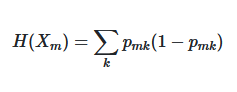

### Entropia

Se define como una medida de incertidumbre o de desorden, y es usado para ayudar a decidir qué atributo debe ser el siguiente en seleccionarse

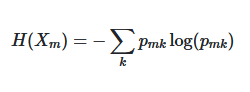

Siendo Pmk la probabilidad de cada clasificacion basada en su misma frecuencia.

# Diagrama de Flujo

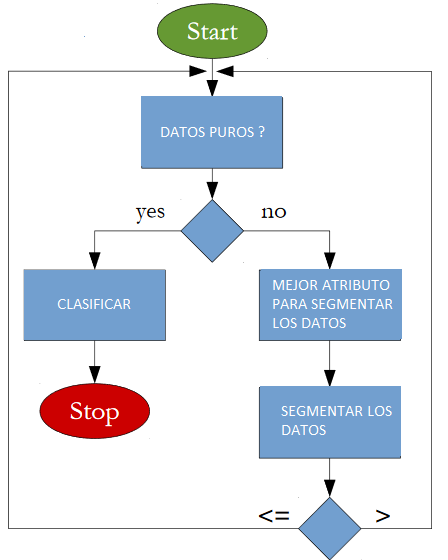

# Importando Librerias
* Pandas: proporciona herramientas de análisis y manipulación de datos de alto rendimiento utilizando sus potentes estructuras de datos
* Numpy: le agrega mayor soporte para vectores y matrices, constituyendo una biblioteca de funciones matemáticas de alto nivel para operar con esos vectores o matrices.
* Matplotlib: es una biblioteca para la generación de gráficos a partir de datos contenidos en listas o arrays en el lenguaje de programación Python y su extensión matemática NumPy
* Seaborn: es la librería con la cual podemos crear gráficos estadísticos informativos y atractivos de forma muy sencilla, se basan en Matplotlib pero ofrece varias características interesantes tales como temas, paletas de colores, funciones y herramientas para visualizar distribuciones de una o varias variables aleatorias, regresiones lineales, series de tiempo.
* Random: Se utiliza para obtener un número aleatorio.

In [1]:
import pandas as pd
import numpy as np
import os 

import matplotlib.pyplot as plt
import seaborn as sns

import random
from pprint import pprint

In [2]:
%matplotlib inline
sns.set_style("darkgrid")

# Preparando los datos
Al preparar los datos se debe decidir que hacer cuando en un data set algunos de estos campos esten vacios o no esten de acuedo al formato de la columna o fila. Tennemos que hacer una limpieza de los datos teniendo los siguientes puntos a considerar: 
* En el primer caso, si los descartamos, lo más probable es que nos obligue a descartar de la información que tenemos, otras variables que sí necesitamos para nuestro análisis y para las cuales tenemos datos.
* En el segundo, debemos elegir la mejor forma para “rellenar” dichos datos ausentes. 

### Preparacion y limpieza
En muchas ocasiones, puede que necesitemos abordar, ordenar y limpiar nuestro dataset. Todo depende del origen de los datos, y de su calidad. Este concepto de ordenar no se refiere a ordenar de mayor a menor las filas de una tabla (que probablemente para el análisis posterior será irrelevante). Nos referimos a ordenar la información de manera que tengamos lo que necesitamos en el formato requerido, y eliminemos lo que nos sobre.
Concluyendo en lo siguiente: 
- La ultima columna debera contener la etiqueta (valor o categoria a predecir) ademas debe tener un nombre en especifico, por lo tanto pondremos como nombre "label".
- No deben de haber valores nulos en el dataframe.

### Cargamos el dataframe

In [3]:
df = pd.read_csv('../data/Iris.csv')

In [4]:
df.head()

,Id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Se procede a eliminar las columnas innecesarias y cambiar el nombre a la última columna

In [5]:
# Procederemos a eliminar columnas innecesarias
df = df.drop("Id", axis=1)
# Cambiamos el nombre a la ultima columna
df = df.rename(columns={'species': 'label'})
df.head()

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Split de Entrenamiento y de Prueba
El Spli te entrenamiento se utiliza para construir el modelo y que este se adapte a los patrones de los datos que se ocupan predecir. Mencionar que los datos de entrenamiento van a ser más grandes que los datos de prueba.
En el Split de prueba, es el que se va a usar para probar si el modelo funciona de manera adecuada, también nos ayuda a ver qué tan preciso es el modelo para predecir los nuevos datos.

## Función que se encarga de segmentar el dataframe en dos partes
* Una de entrenamiento y 
* otra de prueba.

Esta funcion retorna los dos dataframe.

In [6]:
def entrenamiento_prueba_split(df, tamanio_prueba):
    if isinstance(tamanio_prueba, float):
        tamanio_prueba = round(tamanio_prueba * len(df))
        
    indices = df.index.tolist()
    prueba_indices = random.sample(population=indices, k=tamanio_prueba)
    
    df_prueba = df.loc[prueba_indices]
    df_entrenamiento = df.drop(prueba_indices)
    
    return df_entrenamiento, df_prueba    

In [7]:
random.seed(0)
df_entrenamiento, df_prueba = entrenamiento_prueba_split(df, tamanio_prueba=20)

## Datos de Entrenamiento
En la siguiente linea podemos observar que lo que tratamos es visualizar como estan distribuidos los datos de entrenamiento que tenemos. 
En este caso utilizamos lo que es el data set de iris en el cual hay un conjunto de datos que contiene 50 muestras de cada una de tres especies de Iris (Iris setosa, Iris virginica e Iris versicolor). Se midió cuatro rasgos de cada muestra: el largo y ancho del sépalo y pétalo, en centímetros. 

Text(0.5, 1, 'Datos de entrenamiento')

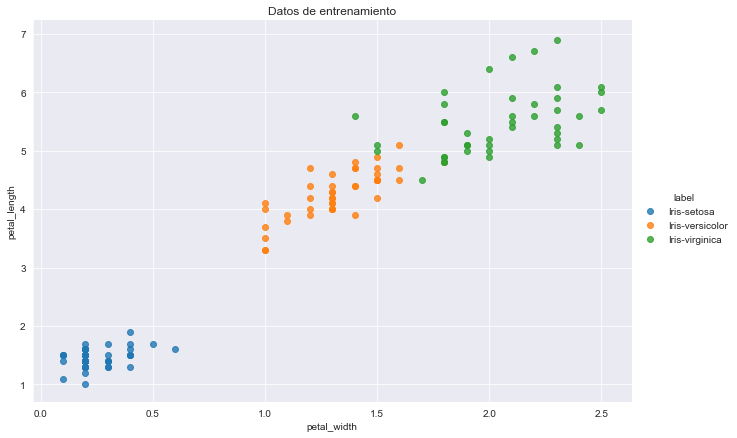

In [8]:
sns.lmplot(data=df_entrenamiento, x='petal_width', y='petal_length', 
           fit_reg=False, hue='label', height=6, aspect=1.5)
titulo = plt.gca()
titulo.set_title("Datos de entrenamiento")

## Datos de Prueba
En el siguiente grafico podemos observar que lo anteriormente dicho sobre los datos de entrenamiento y los datos de prueba se cumplen, ya que en este caso los datos de prueba son menores, pero siempre se trata de clasificar cada uno de los tres tipos de iris.

Text(0.5, 1, 'Datos de Prueba')

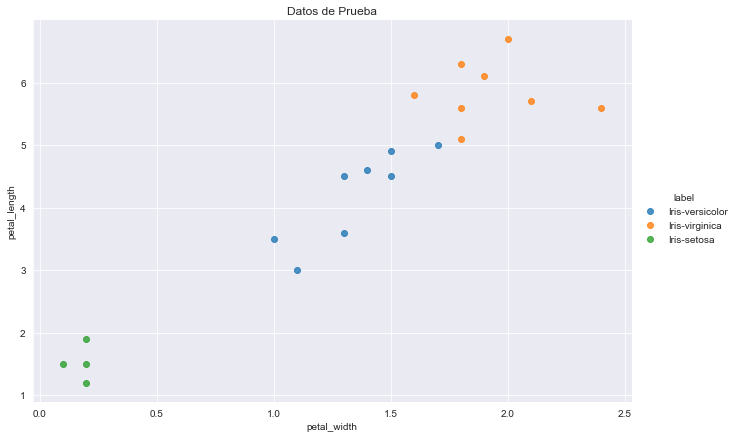

In [9]:
sns.lmplot(data=df_prueba, x='petal_width', y='petal_length', hue='label', fit_reg=False, height=6, aspect=1.5)
titulo = plt.gca()
titulo.set_title("Datos de Prueba")

# Funciones de Apoyo

Nuestras funciones de apoyo seran de acuerdo al algoritmo para encontrar nuestro arbol de decision.
- verificar_pureza
- clasificar_data
- obtener_posibles_segmentos
- segmentar_data
- calcular_entropia
- calcular_entropia_total
- determinar_mejor_segmento

# Verificar Pureza de los datos

Las siguiente funcion nos permite verificar si un determinado segmento de los datos es puro o no. Para que este segmento pueda ser puro unicamente deben de haber datos de una sola clasificacion (tipo).

In [10]:
def verificar_pureza(data):
    label_columna = data[:, -1]
    valores_unicos = np.unique(label_columna)
    
    if len(valores_unicos) == 1:
        return True
    else:
        return False

In [11]:
values = df_prueba[df_prueba['petal_width'] < 0.8].values
verificar_pureza(values)

True

# Clasificacion de los Datos

Esta funcion devuelve una clasificacion basandose en la que mas se repita dentro de un segmento de datos.

In [12]:
def clasificar_data (data):
    label_columna = data[:, -1]
    valores_unicos, cont_valores_unicos = np.unique(label_columna, return_counts=True)
    
    indice = cont_valores_unicos.argmax()
    clasificacion = valores_unicos[indice]
    return clasificacion

# Obtener los segmentos

Esta funcion permite obtener todos los posibles segmentos de acuerdo a los atributos o caracteristicas del dataframe.

In [13]:
def obtener_posibles_segmentos(data):
    posibles_segmentos = {}
    _, n_columnas = data.shape
    for columna_indice in range(n_columnas - 1):
        valores = data[:, columna_indice]
        valores_unicos = np.unique(valores)
        posibles_segmentos[columna_indice] = valores_unicos
        
    return posibles_segmentos

In [14]:
posibles_segmentos = obtener_posibles_segmentos(df_entrenamiento.values)
posibles_segmentos

{0: array([4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5,
        5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
        6.9, 7.0, 7.1, 7.2, 7.6, 7.7, 7.9], dtype=object),
 1: array([2.0, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3,
        3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.4], dtype=object),
 2: array([1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.9, 3.3, 3.5, 3.7, 3.8,
        3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1,
        5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.4, 6.6, 6.7,
        6.9], dtype=object),
 3: array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6,
        1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5], dtype=object)}

En la siguiente grafica podemos visualizar todos los posibles segmentos de acuerdo al ancho del petalo.

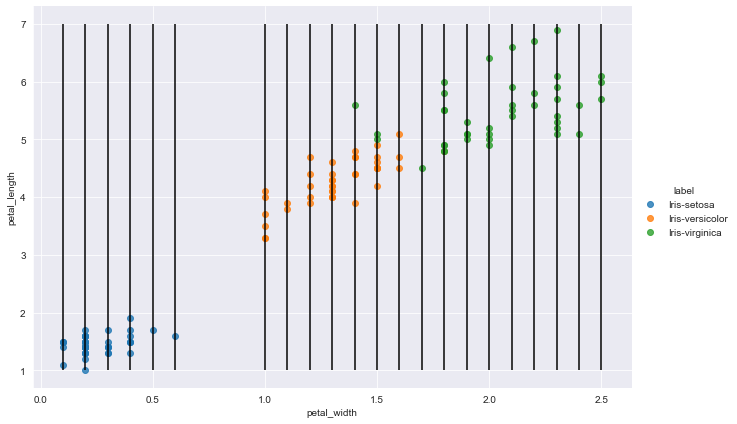

In [15]:
sns.lmplot(data=df_entrenamiento, x='petal_width', y='petal_length',hue='label', fit_reg=False, height=6, aspect=1.5)
plt.vlines(x=posibles_segmentos[3], ymin=1, ymax=7)

# Segmentar los datos

La siguiente funcion nos permite segmentar el dataframe en dos partes de acuerdo a los valores de los posibles segmentos.

In [16]:
def segmentar_data(data, columna_segmentar, valor_segmentar):
    valores_columna_seg = data[:, columna_segmentar]
    
    tipo_de_caracteristica = TIPO_CARACTERISTICA[columna_segmentar]
    if tipo_de_caracteristica == 'continuo':
        data_abajo = data[valores_columna_seg <= valor_segmentar]
        data_arriba = data[valores_columna_seg > valor_segmentar]
    # En el caso de que nuestra caracteristica sea categorica
    else:
        data_abajo = data[valores_columna_seg == valor_segmentar]
        data_arriba = data[valores_columna_seg != valor_segmentar]
        
    return data_abajo, data_arriba


# Determinar Entropia Mas Baja

La siguiente funcion nos permite obtener la entropia de un solo segmento de datos.

In [17]:
def calcular_entropia(data):
    label_columna = data[:, -1]
    _, cantidad = np.unique(label_columna, return_counts=True)
    
    probabilidad = cantidad / cantidad.sum()
    entropia = sum(probabilidad * -np.log2(probabilidad))
    
    return entropia

Las siguiente funcion nos permite obtener la entropia total de dos segmentos del dataframe.

In [18]:
def calcular_entropia_total(data_abajo, data_arriba):
    n = len(data_abajo) + len(data_arriba)
    p_data_abajo = len(data_abajo) / n
    p_data_arriba = len(data_arriba) / n
    
    entropia_total = (p_data_abajo * calcular_entropia(data_abajo)
                     + p_data_arriba * calcular_entropia(data_arriba))
    
    return entropia_total

Con la siguiente funcion podremos determinar el mejor segmento de datos de acuerdo a la entropia total.

In [19]:
def determinar_mejor_segmento(data, posibles_segmentos):
    
    entropia_total = 9999
    for columna_indice in posibles_segmentos:
        for valor in posibles_segmentos[columna_indice]:
            data_abajo, data_arriba = segmentar_data(data, 
                                                     columna_segmentar=columna_indice, 
                                                     valor_segmentar=valor)
            
            entropia_total_actual = calcular_entropia_total(data_abajo, data_arriba)
            
            if entropia_total_actual <= entropia_total:
                entropia_total = entropia_total_actual
                mejor_columna_segmento = columna_indice
                mejor_valor_segmento = valor
                
    return mejor_columna_segmento, mejor_valor_segmento

# Algoritmo del Arbol de Decision

Representacion de un arbol de decision. En este caso como estamos elaborando el algoritmo solamente con pandas y numpy, nuestro arbol sera representado mediante texto, lo cual tambien se le conoce como arbol binario.

In [20]:
ejemplo_arbol = {"petal_width <= 0.8": ["Iris-setosa", 
                                      {"petal_width <= 1.65": [{"petal_length <= 4.9": ["Iris-versicolor", 
                                                                                        "Iris-virginica"]}, 
                                                                "Iris-virginica"]}]}
ejemplo_arbol
                                                         

{'petal_width <= 0.8': ['Iris-setosa',
  {'petal_width <= 1.65': [{'petal_length <= 4.9': ['Iris-versicolor',
      'Iris-virginica']},
    'Iris-virginica']}]}

# Determinar si nuestro atributo es categorico o continuo

La siguiente funcion nos permite determinar el tipo de atributo, ya sea continuo o categorico.

In [21]:
def determinar_tipo_caracteristica(df):
    tipo_caracteristicas = []
    n_valores_unicos = 15
    for caracteristica in df.columns:
        if caracteristica != 'label':
            valores_unicos = df[caracteristica].unique()
            valor_ejemplo = valores_unicos[0]
            # Verificamos el tipo de caracteristica
            if (isinstance(valor_ejemplo, str)) or (len(valores_unicos) <= n_valores_unicos):
                tipo_caracteristicas.append("categorico")
            else:
                tipo_caracteristicas.append("continuo")
    return tipo_caracteristicas

In [22]:
determinar_tipo_caracteristica(df_entrenamiento)

['continuo', 'continuo', 'continuo', 'continuo']

### Algoritmo

In [23]:
sub_arbol = {"question": ["yes_answer", 
                         "no_answer"]}

In [24]:
def algoritmo_arbol(df, contador=0, min_muestras=2, max_profundidad=5):
    # Preparando los datos
    if contador == 0:
        global ENCABEZADOS, TIPO_CARACTERISTICA
        ENCABEZADOS = df.columns
        TIPO_CARACTERISTICA = determinar_tipo_caracteristica(df)
        data = df.values
    else:
        data = df
    
    # Casos base
    if (verificar_pureza(data)) or (len(data) < min_muestras) or (contador == max_profundidad):
        clasificacion = clasificar_data(data)
        return clasificacion
    
    # Parte Recursiva
    else:
        contador += 1
        
        # Llamar funciones de apoyo
        posibles_segmentos = obtener_posibles_segmentos(data)
        columna_segmento, valor_segmento = determinar_mejor_segmento(data, posibles_segmentos)
        data_abajo, data_arriba = segmentar_data(data, columna_segmento, valor_segmento)
        
        # Verificar si existe algun segmento vacio
        if len(data_abajo) == 0 or len(data_arriba) == 0:
            clasificacion = clasificar_data(data)
            return clasificacion
        
        # Determinar las condiciones del arbol
        caracteristica = ENCABEZADOS[columna_segmento]
        tipo_caracteristica = TIPO_CARACTERISTICA[columna_segmento]
        if tipo_caracteristica == 'continuo':
            pregunta = "{} <= {}".format(caracteristica, valor_segmento)
        
        # Si nuestra caracteristica es categorica
        else:
            pregunta = "{} == {}".format(caracteristica, valor_segmento)
        
        # Instanciar arbol
        sub_arbol = {pregunta: []}
        
        # Encontrar Preguntas
        si_respuesta = algoritmo_arbol(data_abajo, contador, min_muestras, max_profundidad)
        no_respuesta = algoritmo_arbol(data_arriba, contador, min_muestras, max_profundidad)
        
        # En ciertos casos estas respuestas podrian ser iguales, 
        # lo cual no tendria ningun sentido, esto surge cuando
        # se clasifican los datos a pesar de no ser puros
        
        if si_respuesta == no_respuesta:
            sub_arbol = si_respuesta
        else:
            sub_arbol[pregunta].append(si_respuesta)
            sub_arbol[pregunta].append(no_respuesta)
        
        return sub_arbol
    

## Comprobamos que el arbol se ha generado correctamente

In [25]:
arbol = algoritmo_arbol(df_entrenamiento, max_profundidad=3)
pprint(arbol)

{'petal_width <= 0.6': ['Iris-setosa',
                        {'petal_width <= 1.6': [{'petal_length <= 4.9': ['Iris-versicolor',
                                                                         'Iris-virginica']},
                                                'Iris-virginica']}]}


# Clasificacion de Datos de Prueba 

### Seleccionamos un registro de nuestra tabla de prueba

In [26]:
ejemplo = df_prueba.iloc[2]
ejemplo

sepal_length            5.4
sepal_width             3.7
petal_length            1.5
petal_width             0.2
label           Iris-setosa
Name: 10, dtype: object

### La siguiente funcion nos permite clasificar un registro de los datos de prueba.

In [27]:
def clasificar_ejemplo(ejemplo, arbol):
    pregunta = list(arbol.keys())[0]
    caracteristica, operador_comparativo, valor = pregunta.split(" ")
    
    if operador_comparativo == "<=":
        if ejemplo[caracteristica] <= float(valor):
            respuesta = arbol[pregunta][0]
        else:
            respuesta = arbol[pregunta][1]
        
    else:
        if str(ejemplo[caracteristica]) == valor:
            respuesta = arbol[pregunta][0]
        else:
            respuesta = arbol[pregunta][1]
            
    # caso base
    if not isinstance(respuesta, dict):
        return respuesta
    # parte recursiva
    else:
        arbol_residual = respuesta
        return clasificar_ejemplo(ejemplo, arbol_residual)

comprobamos la funcion de clasificacion

In [28]:
clasificar_ejemplo(ejemplo, arbol)

'Iris-setosa'

# Calcular Precision

La siguiente funcion calcula la precision de nuestro arbol en base a la cantidad de datos que se predijeron de forma correcta.

In [29]:
def calcular_precision(df, arbol):
    df['clasificacion'] = df.apply(clasificar_ejemplo, axis=1, args=(arbol,))
    df['cls_correcta']= df['clasificacion'] == df['label']
    
    precision = df['cls_correcta'].mean()
    
    return precision

# Comprobar el funcionamiento de un nuevo arbol

In [30]:
df_entrenamiento, df_prueba = entrenamiento_prueba_split(df, tamanio_prueba=0.2)
arbol = algoritmo_arbol(df_entrenamiento, max_profundidad=4)
precision = calcular_precision(df_prueba, arbol)

pprint(arbol)
print(f'El arbol tiene una precision de {precision * 100} %')

{'petal_width <= 0.6': ['Iris-setosa',
                        {'petal_length <= 4.8': [{'petal_width <= 1.6': ['Iris-versicolor',
                                                                         {'sepal_width <= 3.0': ['Iris-virginica',
                                                                                                 'Iris-versicolor']}]},
                                                 {'petal_width <= 1.7': [{'petal_width <= 1.6': ['Iris-virginica',
                                                                                                 'Iris-versicolor']},
                                                                         'Iris-virginica']}]}]}
El arbol tiene una precision de 90.0 %


# Verificamos nuestras predicciones

In [31]:
df_prueba

,sepal_length,sepal_width,petal_length,petal_width,label,clasificacion,cls_correcta
25,5.0,3.0,1.6,0.2,Iris-setosa,Iris-setosa,True
18,5.7,3.8,1.7,0.3,Iris-setosa,Iris-setosa,True
84,5.4,3.0,4.5,1.5,Iris-versicolor,Iris-versicolor,True
120,6.9,3.2,5.7,2.3,Iris-virginica,Iris-virginica,True
143,6.8,3.2,5.9,2.3,Iris-virginica,Iris-virginica,True
149,5.9,3.0,5.1,1.8,Iris-virginica,Iris-virginica,True
90,5.5,2.6,4.4,1.2,Iris-versicolor,Iris-versicolor,True
111,6.4,2.7,5.3,1.9,Iris-virginica,Iris-virginica,True
80,5.5,2.4,3.8,1.1,Iris-versicolor,Iris-versicolor,True
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-virginica,False


Text(0.5, 1, 'Prediccion de los datos de prueba')

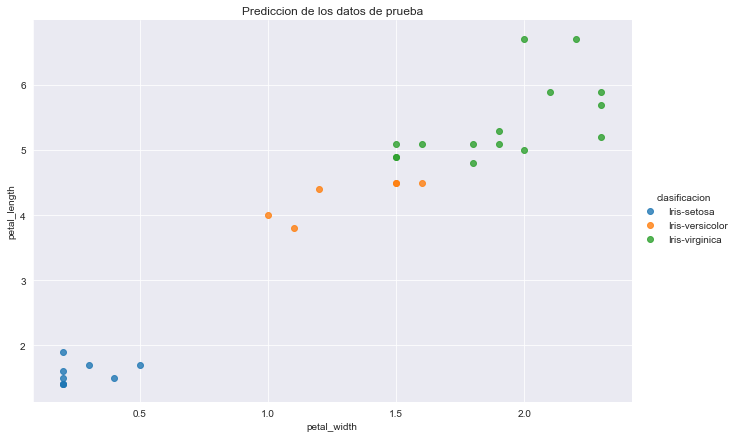

In [32]:
sns.lmplot(data=df_prueba, x="petal_width", y="petal_length", hue="clasificacion", fit_reg=False, height=6, aspect=1.5)
titulo = plt.gca()
titulo.set_title("Prediccion de los datos de prueba")

# Predecir Muertos del Titanic

### Preparar los datos

In [33]:
df_titanic = pd.read_csv('../data/Titanic.csv')

In [34]:
# Eliminar columnas innceserarias
df_titanic['label'] = df_titanic.Survived
df_titanic = df_titanic.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)

In [35]:
df_titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label
0,3,male,22.0,1,0,7.2500,S,0
1,1,female,38.0,1,0,71.2833,C,1
2,3,female,26.0,0,0,7.9250,S,1
3,1,female,35.0,1,0,53.1000,S,1
4,3,male,35.0,0,0,8.0500,S,0


In [36]:
# Verificamos si hay datos nulos
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       714 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  889 non-null    object 
 7   label     891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [37]:
# Eliminar datos nulos
edad_media = df_titanic.Age.median()
emb_moda = df_titanic.Embarked.mode()[0]

df_titanic = df_titanic.fillna({"Age": edad_media, "Embarked": emb_moda})
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    object 
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Embarked  891 non-null    object 
 7   label     891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


## Probar el Algoritmo

In [38]:
df_entrenamiento, df_prueba = entrenamiento_prueba_split(df_titanic, tamanio_prueba=20)
arbol = algoritmo_arbol(df_entrenamiento, max_profundidad=3)
precision = calcular_precision(df_prueba, arbol)

pprint(arbol)
print(f'El arbol tiene una precision de {precision*100} %')

{'Sex == male': [{'Fare <= 26.25': [{'Age <= 12.0': [1, 0]},
                                    {'Fare <= 26.3875': [1, 0]}]},
                 {'Pclass == 3': [{'Fare <= 23.25': [1, 0]}, 1]}]}
El arbol tiene una precision de 70.0 %


## Prueba con un solo dato

In [39]:
ejemplo = df_prueba.iloc[0]
ejemplo

Pclass               3
Sex               male
Age                 30
SibSp                0
Parch                0
Fare             7.225
Embarked             C
label                0
clasificacion        0
cls_correcta      True
Name: 244, dtype: object

In [40]:
clasificar_ejemplo(ejemplo, arbol)

0

## Verificar todos los datos de prueba

In [41]:
df_prueba

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,label,clasificacion,cls_correcta
244,3,male,30.0,0,0,7.2250,C,0,0,True
822,1,male,38.0,0,0,0.0000,S,0,0,True
145,2,male,19.0,1,1,36.7500,S,0,0,True
556,1,female,48.0,1,0,39.6000,C,1,1,True
458,2,female,50.0,0,0,10.5000,S,1,1,True
93,3,male,26.0,1,2,20.5750,S,0,0,True
82,3,female,28.0,0,0,7.7875,Q,1,1,True
327,2,female,36.0,0,0,13.0000,S,1,1,True
520,1,female,30.0,0,0,93.5000,S,1,1,True
501,3,female,21.0,0,0,7.7500,Q,0,1,False


# Arboles de Clasificacion con Sklearn

## Iris-DataSet con Sklearn

In [42]:
from sklearn import tree
# Librerias necesarias para generar imagen del arbol
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont

In [43]:
df_entrenamiento, df_prueba = entrenamiento_prueba_split(df, tamanio_prueba=0.2)

In [44]:
y = df_entrenamiento.values[:,-1]
X = df_entrenamiento.drop('label', axis=1).values

y_prueba = df_prueba.values[:,-1]
X_prueba = df_prueba.drop('label', axis=1).values

clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4)
clf = clf.fit(X,y)

columnas = df_entrenamiento.columns[:-1]
clases = np.unique(df_entrenamiento.values[:,-1])

# Visualizamos la estructura del arbol

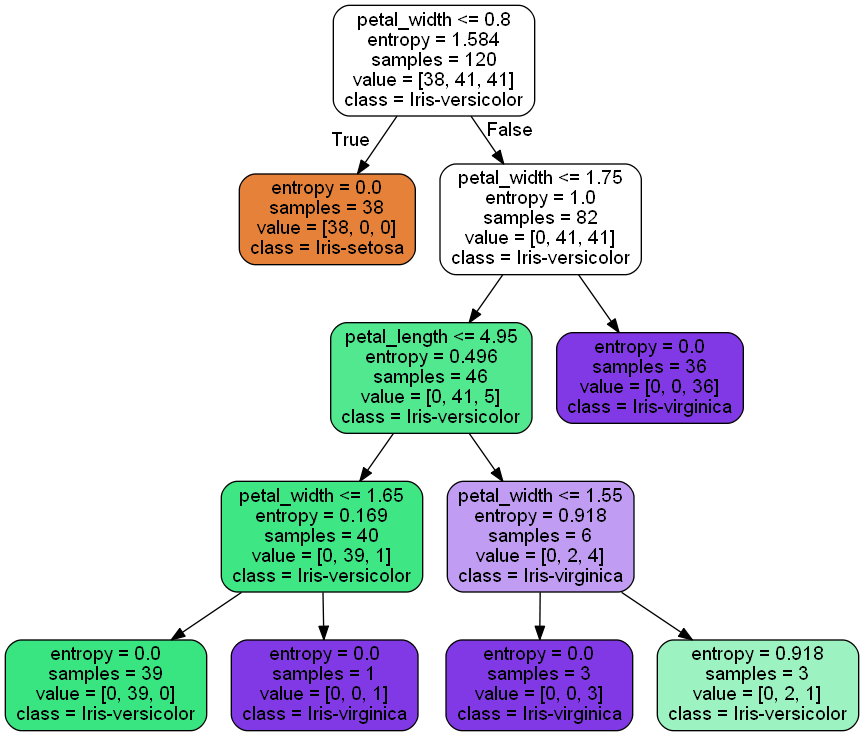

In [45]:
with open(r"iris-tree.dot",'w') as f:
    f = tree.export_graphviz(clf, out_file=f, feature_names=columnas, 
                             class_names=clases, impurity=True, rounded=True, filled=True)
    
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz2.38/bin/'
check_call(['dot','-Tpng',r'iris-tree.dot','-o',r'iris-tree.png'])
PImage("iris-tree.png")

In [46]:
precision = clf.score(X_prueba,y_prueba)
print(f'La precision del arbol es de {precision * 100} %')

La precision del arbol es de 96.66666666666667 %


# Verificamos nuestras predicciones

In [47]:
df_prueba['cls-sklearn'] = clf.predict(X_prueba)
df_prueba['cls-correcta'] = df_prueba['label'] == df_prueba['cls-sklearn'] 
df_prueba

,sepal_length,sepal_width,petal_length,petal_width,label,cls-sklearn,cls-correcta
52,6.9,3.1,4.9,1.5,Iris-versicolor,Iris-versicolor,True
140,6.7,3.1,5.6,2.4,Iris-virginica,Iris-virginica,True
73,6.1,2.8,4.7,1.2,Iris-versicolor,Iris-versicolor,True
113,5.7,2.5,5.0,2.0,Iris-virginica,Iris-virginica,True
23,5.1,3.3,1.7,0.5,Iris-setosa,Iris-setosa,True
98,5.1,2.5,3.0,1.1,Iris-versicolor,Iris-versicolor,True
81,5.5,2.4,3.7,1.0,Iris-versicolor,Iris-versicolor,True
61,5.9,3.0,4.2,1.5,Iris-versicolor,Iris-versicolor,True
74,6.4,2.9,4.3,1.3,Iris-versicolor,Iris-versicolor,True
47,4.6,3.2,1.4,0.2,Iris-setosa,Iris-setosa,True
